## Side Notes
   #### Descriptive Analytics 
       - focuses on what happened?
   #### Diagnostic Analytics
       - focuses on why an event has occured?
   #### Predictive Analytsics
       - focuses on what will happen?
   #### Prescriptive Analytics
       - focuses on how we can make it happen?
    
## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time  

In [2]:
#Get the data

data = pd.read_csv('Data/train.csv')
ride = pd.read_csv('Data/Riders.csv')
sample = pd.read_csv('Data/SampleSubmission.csv')

In [4]:
# data.head()
# ride.head()
# sample.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
Order No                                     21201 non-null object
User Id                                      21201 non-null object
Vehicle Type                                 21201 non-null object
Platform Type                                21201 non-null int64
Personal or Business                         21201 non-null object
Placement - Day of Month                     21201 non-null int64
Placement - Weekday (Mo = 1)                 21201 non-null int64
Placement - Time                             21201 non-null object
Confirmation - Day of Month                  21201 non-null int64
Confirmation - Weekday (Mo = 1)              21201 non-null int64
Confirmation - Time                          21201 non-null object
Arrival at Pickup - Day of Month             21201 non-null int64
Arrival at Pickup - Weekday (Mo = 1)         21201 non-null int64
Arrival at Pickup - Time   

## Questions and Plots

  #### - On which day of the week are the most orders placed?
  #### - Are there any differences between Business & Personal orders in terms of time taken to fulfill the order?
  #### - NB: Business or personal must change to order type 
  #### - Visualise orders by day of the week
   
       

## Visualise orders by day of the week
   #### - This will give us an idea of which day of the week has the highest number of orders

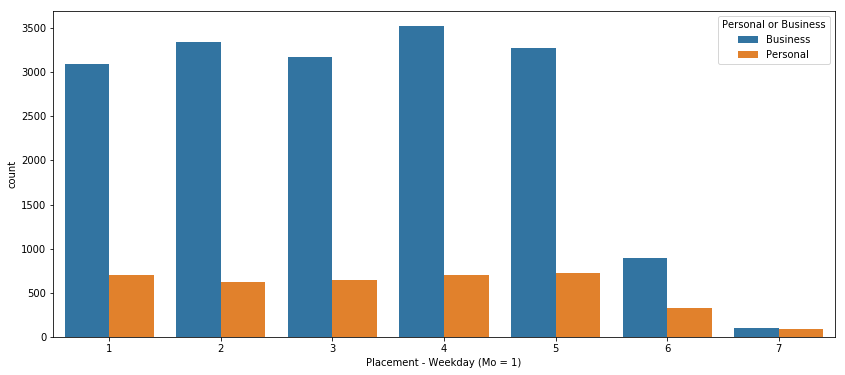

In [5]:
_ = plt.figure(figsize=(14,6))
_ = sns.countplot(data['Placement - Weekday (Mo = 1)'],hue=data['Personal or Business'], data=data)

## Visualise the distribution of orders in terms of distance

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


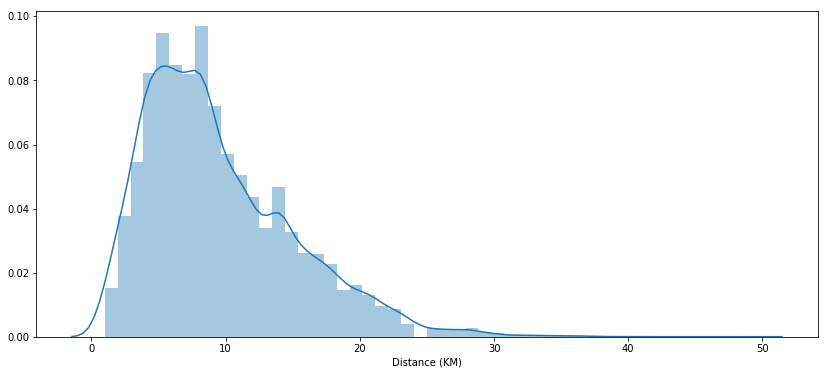

In [6]:
_ = plt.figure(figsize=(14,6))
_ = sns.distplot(data['Distance (KM)'], bins=50)

## Visualise Time from Pickup to Arrival
   #### - This will show how much time it generally takes to complete an order

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


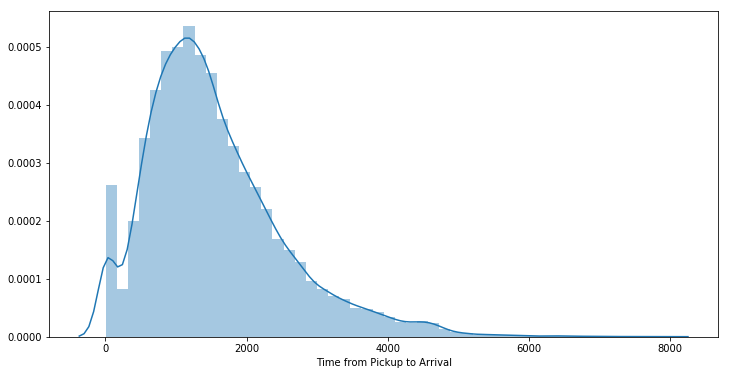

In [14]:
_ = plt.figure(figsize=(12,6))
_ = sns.distplot(data['Time from Pickup to Arrival'], bins=50)

## Visualise correlation
   #### To see which columns are correlated before we apply any transformation to them

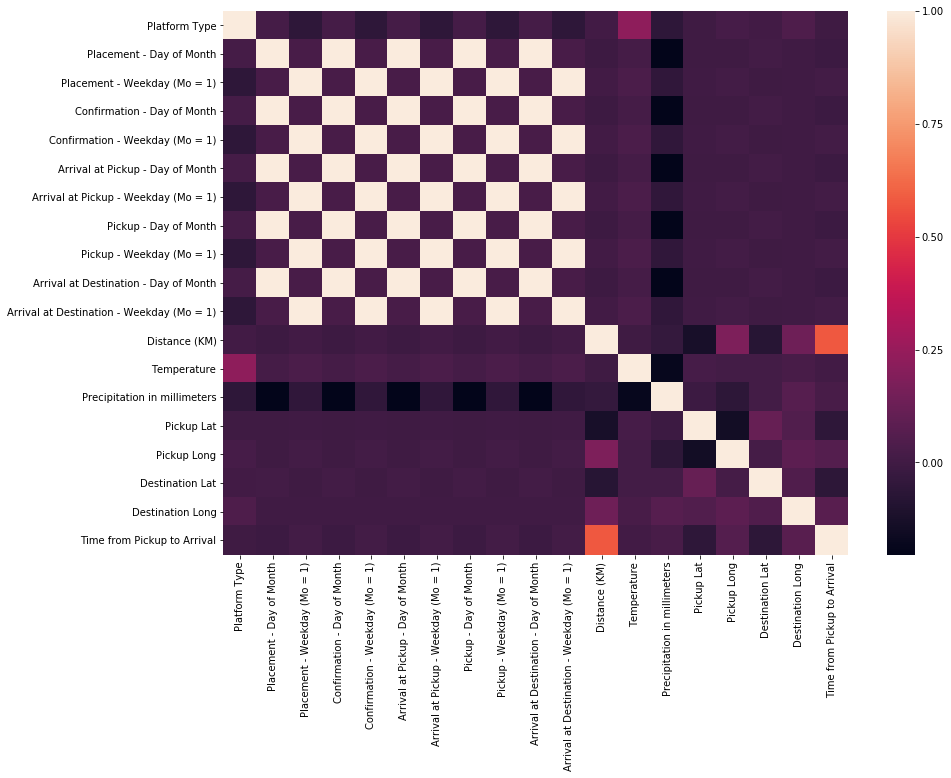

In [19]:
correlation = data.corr()
_ = plt.figure(figsize=(14,10))
_ = sns.heatmap(correlation)

## Visualise missing values by Column

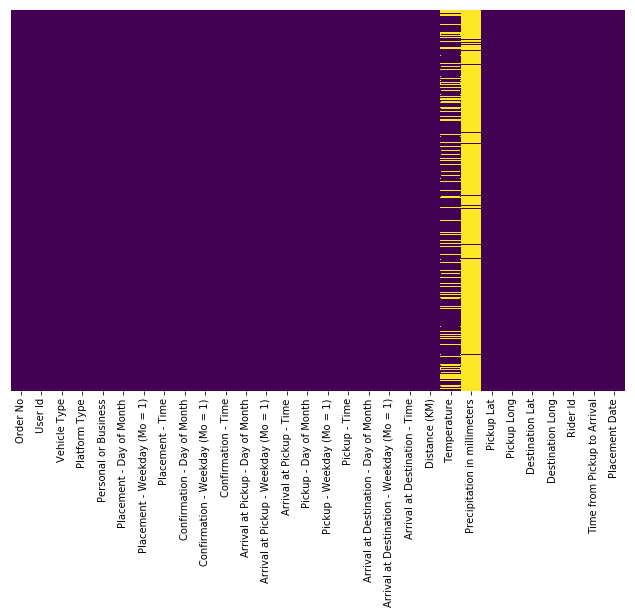

In [212]:
plt.figure(figsize=(11,7))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Calculate the percentage of missing values per column

In [225]:
precipitation_pmd = round(data['Precipitation in millimeters'].isnull().sum()/data['Precipitation in millimeters'].shape[0] * 100,2)
print("Precipitation % Missing Data: " + str(precipitation_pmd))

temp_pmd = round(data['Temperature'].isnull().sum()/data['Temperature'].shape[0] * 100,2)
print("Temperature % Missing Data: " + str(temp_pmd))

Precipitation % Missing Data: 97.4
Temperature % Missing Data: 20.59


# NB: Leave this for now
### Create a new column for Placement Date
   ##### Bring together the placement- day of month, weekday, placement time

In [241]:
# data['Placement Date & Time'] = data['Placement - Weekday (Mo = 1)'].astype(str)+ '-' + data['Placement - Day of Month'].astype(str)+ '-' + data['Placement - Time'].astype(str)

In [305]:
# data[['Placement - Weekday (Mo = 1)','Placement - Day of Month','Placement - Time','Placement Date & Time']].head()

### Convert String Time for all time columns to Time object

   #### Convert : Placement time, Confirmation - Time, Arrival at Pickup - Time, Pickup Time, Arrival at Destination Time

In [335]:
data['Placement Time'] = [datetime.strptime(i,'%I:%M:%S %p').time() for i in data['Placement - Time']]
data['Confirmation Time'] = [datetime.strptime(i,'%I:%M:%S %p').time() for i in data['Confirmation - Time']]
data['Arrival at Pickup Time'] = [datetime.strptime(i,'%I:%M:%S %p').time() for i in data['Arrival at Pickup - Time']]
data['Pickup Time'] = [datetime.strptime(i,'%I:%M:%S %p').time() for i in data['Pickup - Time']]
data['Arrival at Destination Time'] = [datetime.strptime(i,'%I:%M:%S %p').time() for i in data['Arrival at Destination - Time']]

In [338]:
data[['Placement - Time','Confirmation - Time','Arrival at Pickup - Time','Pickup - Time','Arrival at Destination - Time','Placement Time', 
      'Confirmation Time','Arrival at Pickup Time','Pickup Time','Arrival at Destination Time']].head()

,Placement - Time,Confirmation - Time,Arrival at Pickup - Time,Pickup - Time,Arrival at Destination - Time,Placement Time,Confirmation Time,Arrival at Pickup Time,Pickup Time,Arrival at Destination Time
0,9:35:46 AM,9:40:10 AM,10:04:47 AM,10:27:30 AM,10:39:55 AM,09:35:46,09:40:10,10:04:47,10:27:30,10:39:55
1,11:16:16 AM,11:23:21 AM,11:40:22 AM,11:44:09 AM,12:17:22 PM,11:16:16,11:23:21,11:40:22,11:44:09,12:17:22
2,12:39:25 PM,12:42:44 PM,12:49:34 PM,12:53:03 PM,1:00:38 PM,12:39:25,12:42:44,12:49:34,12:53:03,13:00:38
3,9:25:34 AM,9:26:05 AM,9:37:56 AM,9:43:06 AM,10:05:27 AM,09:25:34,09:26:05,09:37:56,09:43:06,10:05:27
4,9:55:18 AM,9:56:18 AM,10:03:53 AM,10:05:23 AM,10:25:37 AM,09:55:18,09:56:18,10:03:53,10:05:23,10:25:37
